# Image recognition algorithm

## How it works
The image recognition algorithm works as follow: 
* you load several images and label each one of them (for example: painting, Van Gogh, Picasso, tree, apple, etc.) according to what is represented on the picture; 
* you then train the algorithm, which is a deep learning algorithm, so it will be able to classify a previously unseen image according to the labels; the algorithm extract key features from each image according to a particular label (e.g., all images labeled with "painting" contain a squared-shape object). 

Deep learning is an algorithm that relies on an artificial neural network with a connected set of neurons, as seen in the previous course "Data mining and machine learning". 

A neuron is an aggregate function that takes many inputs to create one output. It represents an activating function that decides whether the neuron fires or not. All the parameters of the function are trained to fit the model. 



Let's look at this simple Python example. All of it comes from the lesson "Neural Network" from Michalis Vlachios' **Data mining and machine learning** (MScIS, HEC, UNIL, 2019). 

We'll try to predict the number written on a piece of paper. The inputs are the images of handwritten numbers (1, 2, 7, ...), and the outputs are the associated number corresponding to the image. 

The dataset that we'll use contains rows with a set of input parameters, X, representing 64 numerical values (pixels on the image). The output, y, is a scalar representing the real number. 

Requirement already up-to-date: tensorflow in /Users/Samuel/anaconda3/lib/python3.7/site-packages (2.1.0)
Train on 1149 samples, validate on 288 samples
Epoch 1/20
1149/1149 [==============================] - 0s 215us/step - loss: 3.0589 - accuracy: 0.6475 - val_loss: 0.2291 - val_accuracy: 0.9271
Epoch 2/20
1149/1149 [==============================] - 0s 51us/step - loss: 0.2197 - accuracy: 0.9260 - val_loss: 0.1351 - val_accuracy: 0.9583
Epoch 3/20
1149/1149 [==============================] - 0s 54us/step - loss: 0.1253 - accuracy: 0.9617 - val_loss: 0.0986 - val_accuracy: 0.9688
Epoch 4/20
1149/1149 [==============================] - 0s 61us/step - loss: 0.0832 - accuracy: 0.9765 - val_loss: 0.1000 - val_accuracy: 0.9688
Epoch 5/20
1149/1149 [==============================] - 0s 56us/step - loss: 0.0684 - accuracy: 0.9756 - val_lo

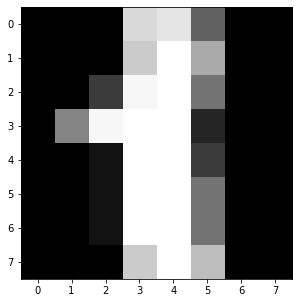

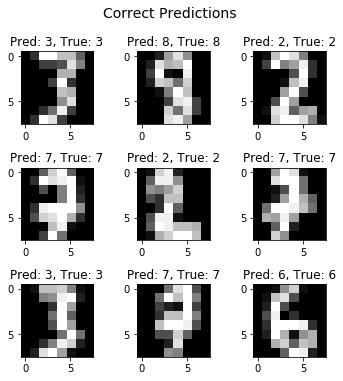

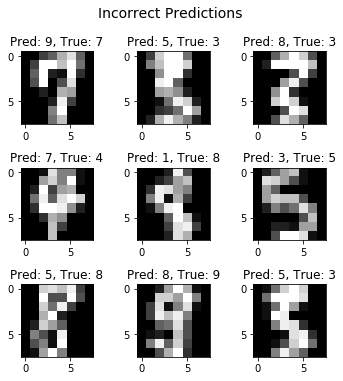

In [12]:
# -- Installing some packages --
!pip install --upgrade tensorflow
!pip install keras

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5) # Make the figures a bit bigger
from sklearn.datasets import load_digits
from keras.utils import np_utils

# -- Load training data --
np.random.seed(1125)
nb_classes = 10

# -- The data, shuffled and split between tran and test sets --
digits = load_digits()
X = digits.data #it's a vector of 64 values (pixels), with zero being a black dot and higher values mean brighter dots
y = digits.target #it's a vector of dimension 1x1 representing the value (number) of the vector X --> y[1] = 1
plt.imshow(X[7].reshape((8,8)), plt.get_cmap('Greys_r'), interpolation='nearest')
#plt.show()
plt.imshow(X[1].reshape((8,8)), plt.get_cmap('Greys_r'), interpolation='nearest')

# -- Train/test split --
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
#convert target labels to one-hot vectors, this is required if we want to use categorical cross-entropy
Y_train = np_utils.to_categorical(Y_train, nb_classes) 
Y_test = np_utils.to_categorical(Y_test, nb_classes) 

# -- Building a simple neural network with Keras --
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import optimizers
np.random.seed(1125)

# -- Build the neural network --
model = Sequential()
model.add(Dense(512, input_shape=(64,)))
model.add(Activation('relu')) #An "activation" is just a non-linear function applied to the output of the layer above. Here, with a "rectified linear unit", we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2)) #Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(10))
model.add(Activation('softmax')) #This special "softmax" activation among other things, ensures that the output is a valid probability distribution, so that its values are all non-negative and sum to 1. 

# -- Compile the model --
optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#model.summary() #It shows a summary of the architecture of the neural network

# -- Train the model --
model_hist = model.fit(X_train, Y_train, batch_size=64, epochs=20, verbose=1, validation_split=0.2)

# -- Evaluate its performance --
'''plt.figure(figsize=(7,7))
plt.plot(model_hist.history['val_accuracy']) # or model_hist.history['val_acc'] depending on tf version
plt.xlabel("#Epochs")
plt.ylabel("Validation Accuracy")
plt.title("validation accuracy in different epochs")
plt.show()'''

# -- Performance of the model on the unseen test set --
score = model.evaluate(X_test, Y_test, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

# -- Inspecting the output --
# This outputs the highest probability class according to the trained classifier for each input example 
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
actual_classes = np.where(Y_test==1)[1]

correct_indices = np.nonzero(predicted_classes == actual_classes)[0]
incorrect_indices = np.nonzero(predicted_classes != actual_classes)[0]

# Plot it
fig, axes = plt.subplots(3, 3, figsize=(5, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[correct_indices[i]].reshape(8,8), cmap='gray', interpolation='none')
    ax.set_title("Pred: {}, True: {}".format(predicted_classes[correct_indices[i]], actual_classes[correct_indices[i]]))
plt.suptitle('Correct Predictions', y=1.05, size=14)
plt.tight_layout()
    
fig, axes = plt.subplots(3, 3, figsize=(5, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[incorrect_indices[i]].reshape(8,8), cmap='gray', interpolation='none')
    ax.set_title("Pred: {}, True: {}".format(predicted_classes[incorrect_indices[i]], actual_classes[incorrect_indices[i]]))
plt.suptitle('Incorrect Predictions', y=1.05, size=14)
plt.tight_layout()

And this is it! On these images, we can see: 
* the **input** (each vector of 64 pixels representing a handwritten number), 
* the **prediction** of our deep learing algorithm (Pred: y'), 
* and the **real value** of the number (True: y). 

In this example, the algorithm successfully predicted the values for 9 variables, and failed to assert the correct number to 9 variables. The algorithm's performance would be better if we could train it with more variables (more images). 